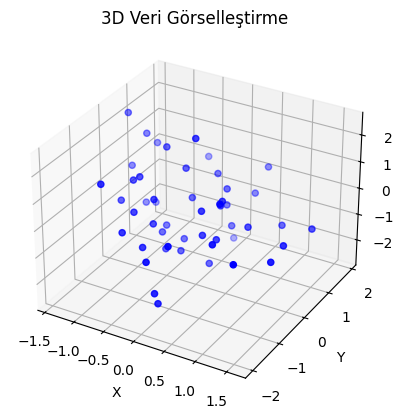

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

np.random.seed(42)

num_samples = 50
data = np.random.randn(num_samples, 3) # create 3d synthetic data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Veri Görselleştirme')
plt.show()

In [38]:
data_tensor = torch.tensor(data, dtype=torch.float32)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 3)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

autoencoder = AutoEncoder()

# training
NUM_EPOCHS = 100

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(autoencoder.parameters(), lr=0.1)

for epoch in range(NUM_EPOCHS):
    out = autoencoder(data_tensor)
    loss = criterion(out, data_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {loss.item():.3f}')

Epoch 1/100, Loss: 1.088
Epoch 6/100, Loss: 0.725
Epoch 11/100, Loss: 0.564
Epoch 16/100, Loss: 0.469
Epoch 21/100, Loss: 0.409
Epoch 26/100, Loss: 0.370
Epoch 31/100, Loss: 0.341
Epoch 36/100, Loss: 0.320
Epoch 41/100, Loss: 0.303
Epoch 46/100, Loss: 0.288
Epoch 51/100, Loss: 0.274
Epoch 56/100, Loss: 0.262
Epoch 61/100, Loss: 0.251
Epoch 66/100, Loss: 0.240
Epoch 71/100, Loss: 0.230
Epoch 76/100, Loss: 0.222
Epoch 81/100, Loss: 0.214
Epoch 86/100, Loss: 0.206
Epoch 91/100, Loss: 0.200
Epoch 96/100, Loss: 0.194


In [39]:
with torch.inference_mode():
    data_2d = autoencoder.encoder(data_tensor).numpy()
data_2d.shape

(50, 2)

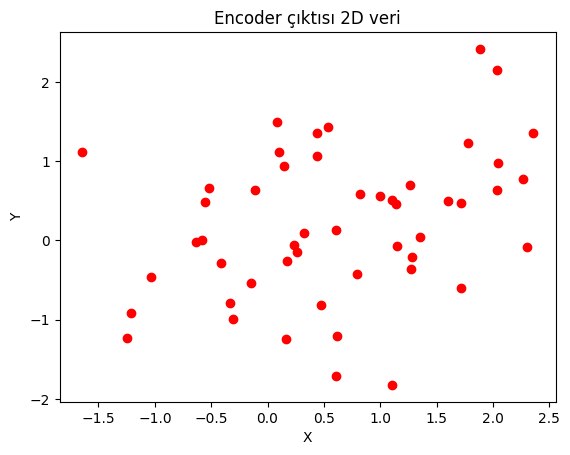

In [40]:
plt.figure()
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='r', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Encoder çıktısı 2D veri')
plt.show()

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data_2d_pca = pca.fit_transform(data)
data_2d_pca.shape

(50, 2)

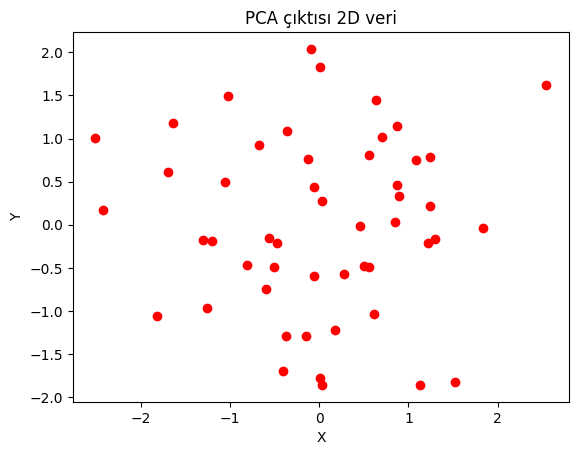

In [42]:
plt.figure()
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c='r', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA çıktısı 2D veri')
plt.show()